<a href="https://colab.research.google.com/github/dhanush852/intro_to-ml/blob/main/homework_4_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, precision_score, recall_score, f1_score,average_precision_score, log_loss
import warnings
from sklearn.decomposition import PCA
warnings.filterwarnings("ignore")


In [ ]:
url = 'https://raw.githubusercontent.com/dhanush852/intro_to-ml/main/cancer.csv'
df = pd.read_csv(url)

# Display the first 5 rows of the DataFrame
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df = df.drop(columns = ['id', 'Unnamed: 32'])

In [ ]:
df['diagnosis'].replace({'B': 0, 'M': 1}, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [ ]:
scale= StandardScaler()
X_scaled = scale.fit_transform(X) # standardization of dependent variables
X_scaled.shape

(569, 30)

In [ ]:
from sklearn.svm import SVC, SVR
np.random.seed(9)

In [ ]:
accuracy = []
precision = []
recall = []
f1Score = []
for k in range(1,30,2):
    pca = PCA(n_components = k)
    principalComponents = pca.fit_transform(X_scaled)
    X_train, X_test, y_train, y_test = train_test_split(principalComponents,
                                                        y,
                                                        train_size = 0.8,
                                                        test_size = 0.20,
                                                        random_state = 100)
    # Linear Support vector classifier
    classifier = SVC(kernel = 'linear', C = 10)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracy.append(acc)
    precision.append(prec)
    recall.append(rec)
    f1Score.append(f1)

    print(f"for k = {k}, accuracy = {acc} , precision = {prec}, recall = {rec} and f1score = {f1}")

for k = 1, accuracy = 0.9122807017543859 , precision = 0.9333333333333333, recall = 0.8571428571428571 and f1score = 0.8936170212765957
for k = 3, accuracy = 0.9649122807017544 , precision = 0.9591836734693877, recall = 0.9591836734693877 and f1score = 0.9591836734693877
for k = 5, accuracy = 0.9649122807017544 , precision = 0.9787234042553191, recall = 0.9387755102040817 and f1score = 0.9583333333333333
for k = 7, accuracy = 0.956140350877193 , precision = 0.9782608695652174, recall = 0.9183673469387755 and f1score = 0.9473684210526316
for k = 9, accuracy = 0.9736842105263158 , precision = 1.0, recall = 0.9387755102040817 and f1score = 0.968421052631579
for k = 11, accuracy = 0.956140350877193 , precision = 0.9583333333333334, recall = 0.9387755102040817 and f1score = 0.9484536082474228
for k = 13, accuracy = 0.9473684210526315 , precision = 0.9387755102040817, recall = 0.9387755102040817 and f1score = 0.9387755102040817
for k = 15, accuracy = 0.956140350877193 , precision = 0.9583333

In [ ]:
k_list = [i for i in range(1,30,2)]
k_list

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]

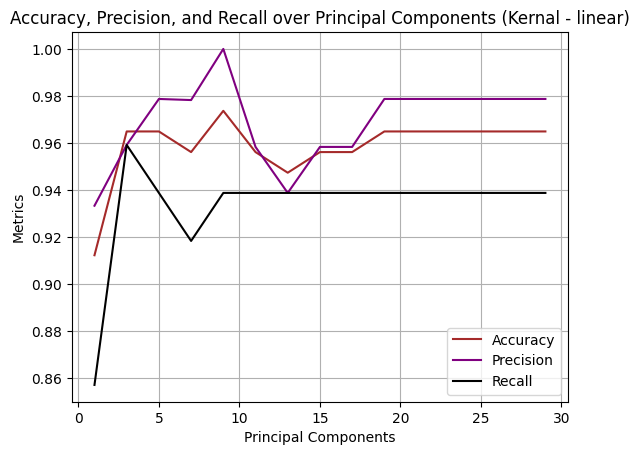

In [ ]:
plt.figure()
plt.plot(k_list, accuracy, color = 'brown', label = "Accuracy")
plt.plot(k_list, precision, color = 'purple', label = "Precision")
plt.plot(k_list, recall, color = 'black', label = "Recall")
plt.grid()
plt.xlabel('Principal Components')
plt.ylabel('Metrics')
plt.title('Accuracy, Precision, and Recall over Principal Components (Kernal - linear)')
plt.legend()

It appears that using 13 principal components leads to the highest levels of accuracy, precision, and recall in the context of a linear kernel. Therefore, for this specific scenario, a value of 'k' equal to 13 seems to be the optimal choice, considering these performance metrics. However, it's important to emphasize that this determination should be based on a rigorous evaluation method, such as cross-validation or grid search, rather than being made solely based on visual inspection of results.


In [38]:
accuracy = []
precision = []
recall = []
f1Score = []
for k in range(1,30,2):
    pca = PCA(n_components = k)
    principalComponents = pca.fit_transform(X_scaled)
    X_train, X_test, y_train, y_test = train_test_split(principalComponents,
                                                        y,
                                                        train_size = 0.8,
                                                        test_size = 0.20,
                                                        random_state = 100)
    # Linear Support vector classifier
    classifier = SVC(kernel = 'rbf', C = 10)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracy.append(acc)
    precision.append(prec)
    recall.append(rec)
    f1Score.append(f1)

    print(f"for k = {k}, accuracy = {acc} , precision = {prec}, recall = {rec} and f1score = {f1}")

for k = 1, accuracy = 0.9122807017543859 , precision = 0.9333333333333333, recall = 0.8571428571428571 and f1score = 0.8936170212765957
for k = 3, accuracy = 0.9473684210526315 , precision = 0.9387755102040817, recall = 0.9387755102040817 and f1score = 0.9387755102040817
for k = 5, accuracy = 0.9473684210526315 , precision = 0.9387755102040817, recall = 0.9387755102040817 and f1score = 0.9387755102040817
for k = 7, accuracy = 0.9473684210526315 , precision = 0.9387755102040817, recall = 0.9387755102040817 and f1score = 0.9387755102040817
for k = 9, accuracy = 0.9736842105263158 , precision = 0.9791666666666666, recall = 0.9591836734693877 and f1score = 0.9690721649484536
for k = 11, accuracy = 0.9736842105263158 , precision = 0.9791666666666666, recall = 0.9591836734693877 and f1score = 0.9690721649484536
for k = 13, accuracy = 0.9649122807017544 , precision = 0.9787234042553191, recall = 0.9387755102040817 and f1score = 0.9583333333333333
for k = 15, accuracy = 0.9649122807017544 , pr

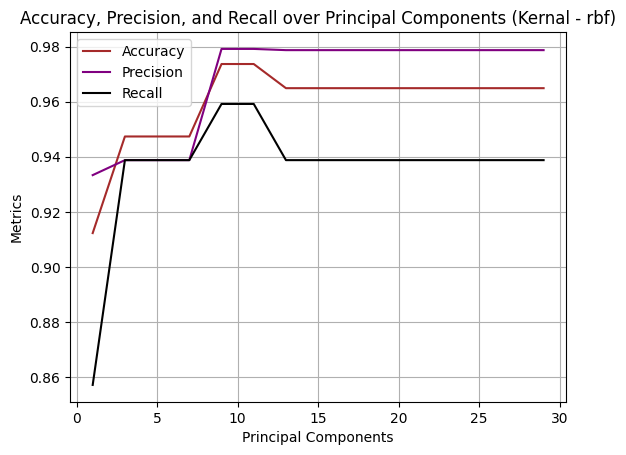

In [40]:
plt.figure()
plt.plot(k_list, accuracy, color = 'brown', label = "Accuracy")
plt.plot(k_list, precision, color = 'purple', label = "Precision")
plt.plot(k_list, recall, color = 'black', label = "Recall")
plt.grid()
plt.xlabel('Principal Components')
plt.ylabel('Metrics')
plt.title('Accuracy, Precision, and Recall over Principal Components (Kernal - rbf)')
plt.legend()

In [41]:
accuracy = []
precision = []
recall = []
f1Score = []
for k in range(1,30,2):
    pca = PCA(n_components = k)
    principalComponents = pca.fit_transform(X_scaled)
    X_train, X_test, y_train, y_test = train_test_split(principalComponents,
                                                        y,
                                                        train_size = 0.8,
                                                        test_size = 0.20,
                                                        random_state = 100)
    # Linear Support vector classifier
    classifier = SVC(kernel = 'poly', C = 10000)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracy.append(acc)
    precision.append(prec)
    recall.append(rec)
    f1Score.append(f1)

    print(f"for k = {k}, accuracy = {acc} , precision = {prec}, recall = {rec} and f1score = {f1}")

for k = 1, accuracy = 0.8859649122807017 , precision = 0.9736842105263158, recall = 0.7551020408163265 and f1score = 0.8505747126436782
for k = 3, accuracy = 0.9824561403508771 , precision = 0.9795918367346939, recall = 0.9795918367346939 and f1score = 0.9795918367346939
for k = 5, accuracy = 0.9298245614035088 , precision = 0.9019607843137255, recall = 0.9387755102040817 and f1score = 0.92
for k = 7, accuracy = 0.9122807017543859 , precision = 0.9148936170212766, recall = 0.8775510204081632 and f1score = 0.8958333333333333
for k = 9, accuracy = 0.9385964912280702 , precision = 0.9375, recall = 0.9183673469387755 and f1score = 0.9278350515463918
for k = 11, accuracy = 0.9385964912280702 , precision = 0.9375, recall = 0.9183673469387755 and f1score = 0.9278350515463918
for k = 13, accuracy = 0.9473684210526315 , precision = 0.9387755102040817, recall = 0.9387755102040817 and f1score = 0.9387755102040817
for k = 15, accuracy = 0.9473684210526315 , precision = 0.9215686274509803, recall =

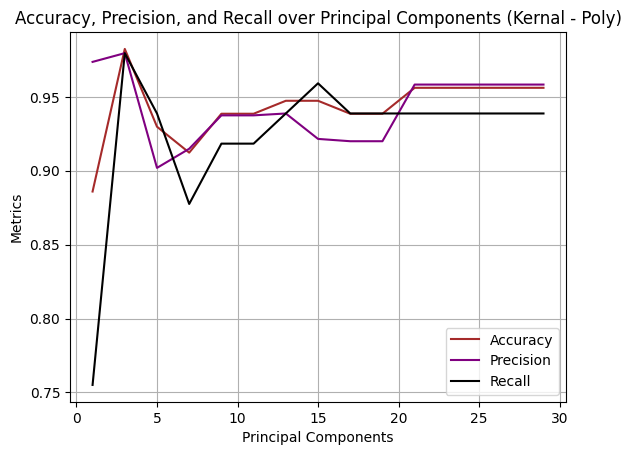

In [42]:
plt.figure()
plt.plot(k_list, accuracy, color = 'brown', label = "Accuracy")
plt.plot(k_list, precision, color = 'purple', label = "Precision")
plt.plot(k_list, recall, color = 'black', label = "Recall")
plt.grid()
plt.xlabel('Principal Components')
plt.ylabel('Metrics')
plt.title('Accuracy, Precision, and Recall over Principal Components (Kernal - Poly)')
plt.legend()

The optimal value for the poly kernel, taking into account accuracy, precision, and recall, is clearly k = 7, as it is evident that 7 principal components deliver the highest levels of these performance metrics.

2nd QUESTION

In [43]:
from sklearn.metrics import mean_squared_error

In [44]:

#Use the URL for the raw CSV data
url = 'https://raw.githubusercontent.com/dhanush852/intro_to-ml/main/Housing.csv'
df = pd.read_csv(url)

# Display the first 5 rows of the DataFrame
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [45]:
input_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
output_features = 'price'

In [46]:
binary_columns = df.select_dtypes(include=['object']).columns
binary_columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [47]:
df[binary_columns] = df[binary_columns].apply(lambda x: x.map({'yes': 1, 'no': 0}))

In [48]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,NaN
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,NaN
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,NaN
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,NaN
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,NaN


In [49]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(9)
train_data, test_data = train_test_split(df[input_features + [output_features]], train_size = 0.8, test_size = 0.2, random_state = 100)

In [50]:
train_data.shape, test_data.shape

((436, 12), (109, 12))

In [51]:
X_train = train_data[input_features].to_numpy()
y_train = train_data[['price']].to_numpy()
X_test = test_data[input_features].to_numpy()
y_test = test_data[['price']].to_numpy()

In [52]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((436, 11), (436, 1), (109, 11), (109, 1))

In [53]:
scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(X_train)
x_test_scaled = scalar.transform(X_test)

In [56]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(x_train_scaled, y_train).predict(x_test_scaled)
y_lin = svr_lin.fit(x_train_scaled, y_train).predict(x_test_scaled)
y_poly = svr_poly.fit(x_train_scaled, y_train).predict(x_test_scaled)

In [57]:
rbf_error, lin_error, poly_error = mean_squared_error(y_test, y_rbf) ** 0.5, mean_squared_error(y_test, y_lin) ** 0.5, mean_squared_error(y_test, y_poly) ** 0.5

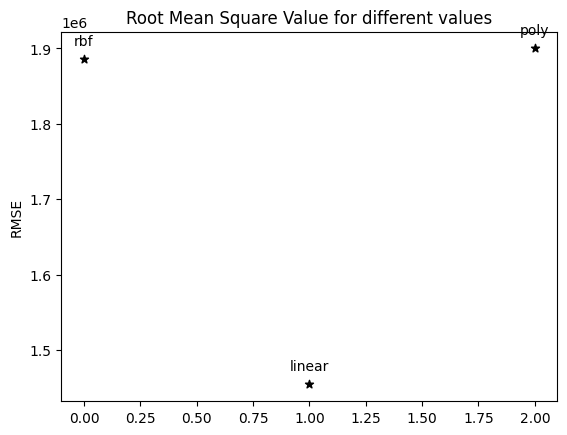

In [60]:
error = [rbf_error, lin_error, poly_error]
values = ['rbf', 'linear', 'poly']

plt.scatter(range(len(error)), error, marker='*', color='black', label='Data Points')
for i, value in enumerate(values):
    plt.annotate(value, (i, error[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.ylabel('RMSE')
plt.title('Root Mean Square Value for different values')

plt.show()


In [61]:
scalar = StandardScaler()
X = df[input_features]
y = df[output_features]
X_scaled = scalar.fit_transform(X)

In [62]:
max_k =X_scaled.shape[1]

In [63]:
accuracy = []
rmse = []
for k in range(1,max_k+1):
    pca = PCA(n_components = k)
    principalComponents = pca.fit_transform(X_scaled)
    train_X, test_X, train_Y, test_Y = train_test_split(principalComponents,
                                                        y,
                                                        train_size = 0.8,
                                                        test_size = 0.20,
                                                        random_state = 100)
    model = SVR(kernel = 'linear', C = 100000)
    model.fit(train_X, train_Y)

    y_pred = model.predict(test_X)

    acc = model.score(test_X, test_Y)
    accuracy.append(acc)
    rms = mean_squared_error(test_Y, y_pred) ** 0.5
    rmse.append(rms)

    print(f"for k = {k}, accuracy = {acc} , and Root Mean Square Value = {rms}")

for k = 1, accuracy = 0.6803158885707417 , and Root Mean Square Value = 1062223.5901847468
for k = 2, accuracy = 0.6802054943477549 , and Root Mean Square Value = 1062406.9793836533
for k = 3, accuracy = 0.6808498198827846 , and Root Mean Square Value = 1061336.1650266782
for k = 4, accuracy = 0.6809378719023348 , and Root Mean Square Value = 1061189.7461222573
for k = 5, accuracy = 0.6748753489623831 , and Root Mean Square Value = 1071224.1763571056
for k = 6, accuracy = 0.6653849720889603 , and Root Mean Square Value = 1086746.2167545045
for k = 7, accuracy = 0.677212022519929 , and Root Mean Square Value = 1067367.7863756889
for k = 8, accuracy = 0.6776371527750512 , and Root Mean Square Value = 1066664.6625299233
for k = 9, accuracy = 0.6572393340800122 , and Root Mean Square Value = 1099894.1827066718
for k = 10, accuracy = 0.6563776074769626 , and Root Mean Square Value = 1101275.923968242
for k = 11, accuracy = 0.6806896152339323 , and Root Mean Square Value = 1061602.5124484452

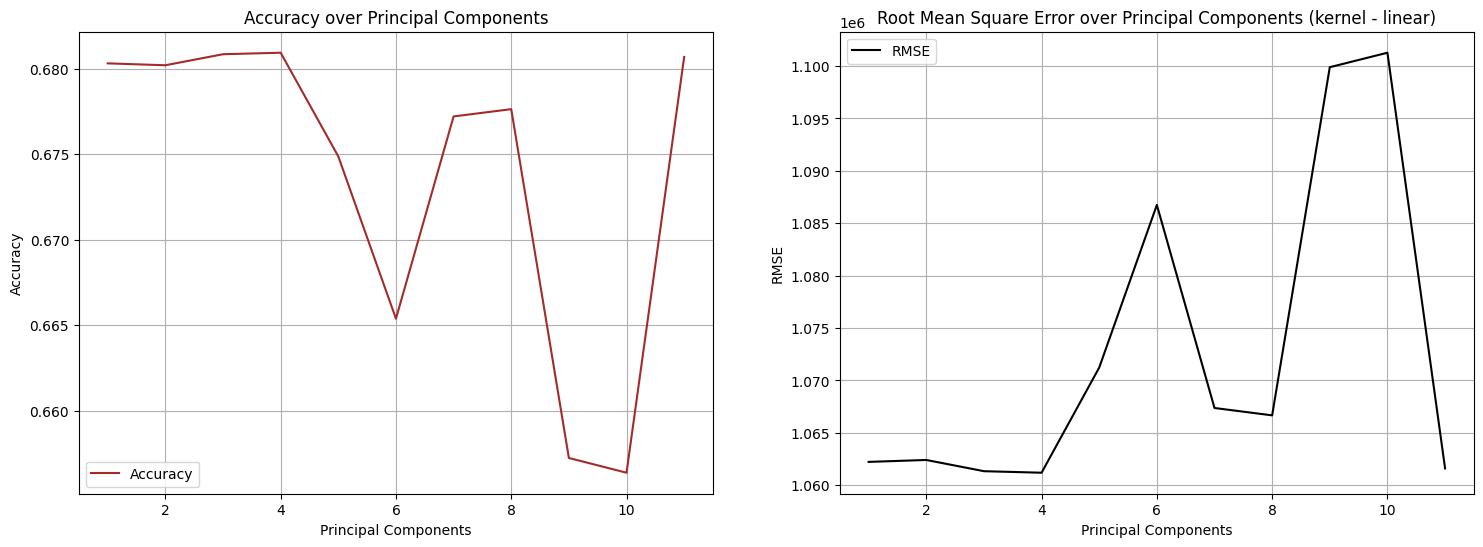

In [65]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, max_k+1), accuracy, color = 'brown', label = "Accuracy")
plt.grid()
plt.xlabel('Principal Components')
plt.ylabel('Accuracy')
plt.title('Accuracy over Principal Components')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, max_k+1), rmse, color = 'black', label = "RMSE")
plt.grid()
plt.xlabel('Principal Components')
plt.ylabel('RMSE')
plt.title('Root Mean Square Error over Principal Components (kernel - linear)')
plt.legend()

plt.show()

In [66]:
accuracy = []
rmse = []
for k in range(1,max_k+1):
    pca = PCA(n_components = k)
    principalComponents = pca.fit_transform(X_scaled)
    train_X, test_X, train_Y, test_Y = train_test_split(principalComponents,
                                                        y,
                                                        train_size = 0.8,
                                                        test_size = 0.20,
                                                        random_state = 100)
    model = SVR(kernel = 'rbf', C = 100000)
    model.fit(train_X, train_Y)

    y_pred = model.predict(test_X)

    acc = model.score(test_X, test_Y)
    accuracy.append(acc)
    rms = mean_squared_error(test_Y, y_pred) ** 0.5
    rmse.append(rms)

    print(f"for k = {k}, accuracy = {acc} , and Root Mean Square Value = {rms}")

for k = 1, accuracy = 0.5782990568228805 , and Root Mean Square Value = 1219994.0211153533
for k = 2, accuracy = 0.5818165471926999 , and Root Mean Square Value = 1214895.2615713775
for k = 3, accuracy = 0.5858183678131987 , and Root Mean Square Value = 1209068.297188257
for k = 4, accuracy = 0.5879027527835323 , and Root Mean Square Value = 1206022.1185320052
for k = 5, accuracy = 0.5803798265804678 , and Root Mean Square Value = 1216980.4330818763
for k = 6, accuracy = 0.5573860678713229 , and Root Mean Square Value = 1249878.9565329854
for k = 7, accuracy = 0.5632954992918968 , and Root Mean Square Value = 1241507.2214191742
for k = 8, accuracy = 0.5432786892812105 , and Root Mean Square Value = 1269641.3386603943
for k = 9, accuracy = 0.5324014111614597 , and Root Mean Square Value = 1284671.270742172
for k = 10, accuracy = 0.5314882351834337 , and Root Mean Square Value = 1285925.0798608593
for k = 11, accuracy = 0.529147043835095 , and Root Mean Square Value = 1289134.012075841


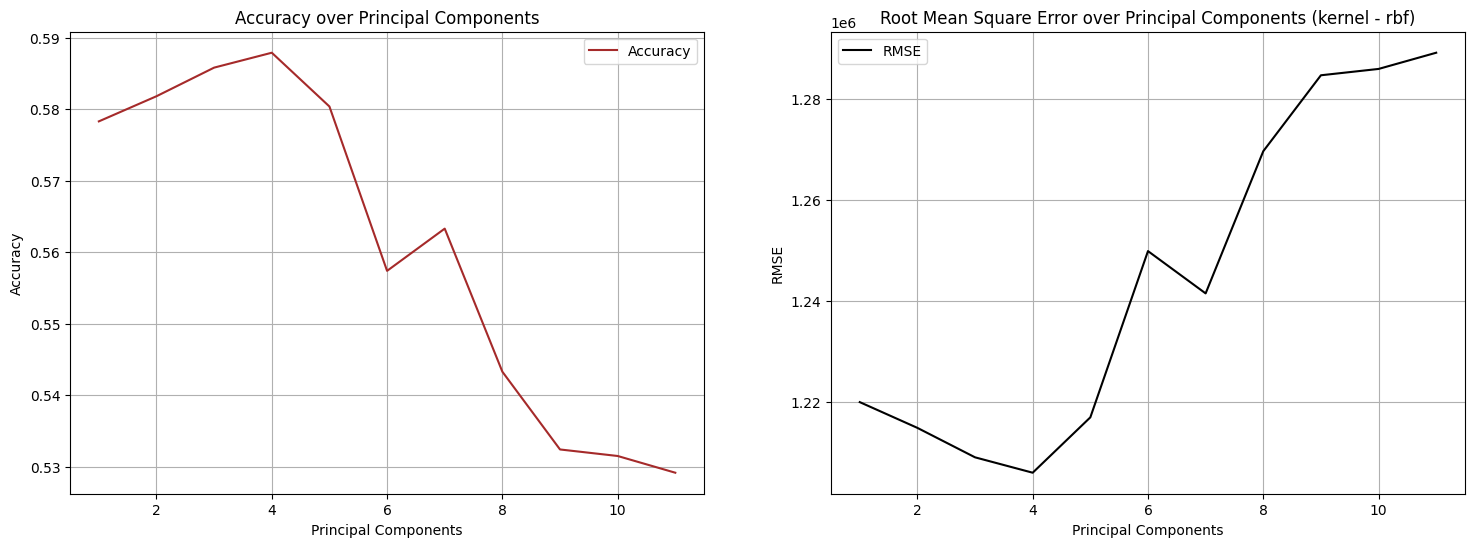

In [68]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, max_k+1), accuracy, color = 'brown', label = "Accuracy")
plt.grid()
plt.xlabel('Principal Components')
plt.ylabel('Accuracy')
plt.title('Accuracy over Principal Components')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, max_k+1), rmse, color = 'black', label = "RMSE")
plt.grid()
plt.xlabel('Principal Components')
plt.ylabel('RMSE')
plt.title('Root Mean Square Error over Principal Components (kernel - rbf)')
plt.legend()

plt.show()

In [69]:
accuracy = []
rmse = []
for k in range(1,max_k+1):
    pca = PCA(n_components = k)
    principalComponents = pca.fit_transform(X_scaled)
    train_X, test_X, train_Y, test_Y = train_test_split(principalComponents,
                                                        y,
                                                        train_size = 0.8,
                                                        test_size = 0.20,
                                                        random_state = 100)
    model = SVR(kernel = 'poly', C = 100000)
    model.fit(train_X, train_Y)

    y_pred = model.predict(test_X)

    acc = model.score(test_X, test_Y)
    accuracy.append(acc)
    rms = mean_squared_error(test_Y, y_pred) ** 0.5
    rmse.append(rms)

    print(f"for k = {k}, accuracy = {acc} , and Root Mean Square Value = {rms}")

for k = 1, accuracy = 0.31714166408225253 , and Root Mean Square Value = 1552461.0890908423
for k = 2, accuracy = 0.467703920207427 , and Root Mean Square Value = 1370667.2938724437
for k = 3, accuracy = 0.4464046969979034 , and Root Mean Square Value = 1397821.1728769122
for k = 4, accuracy = 0.5100900216456287 , and Root Mean Square Value = 1314963.0779365867
for k = 5, accuracy = 0.5305639334635256 , and Root Mean Square Value = 1287192.9211478513
for k = 6, accuracy = 0.5786342292974225 , and Root Mean Square Value = 1219509.0925123761
for k = 7, accuracy = 0.5859319521983513 , and Root Mean Square Value = 1208902.4995222944
for k = 8, accuracy = 0.5878494724865032 , and Root Mean Square Value = 1206100.0796689747
for k = 9, accuracy = 0.5680265211729172 , and Root Mean Square Value = 1234763.9975372304
for k = 10, accuracy = 0.5688576352818713 , and Root Mean Square Value = 1233575.5867664812
for k = 11, accuracy = 0.5688748047948929 , and Root Mean Square Value = 1233551.02399476

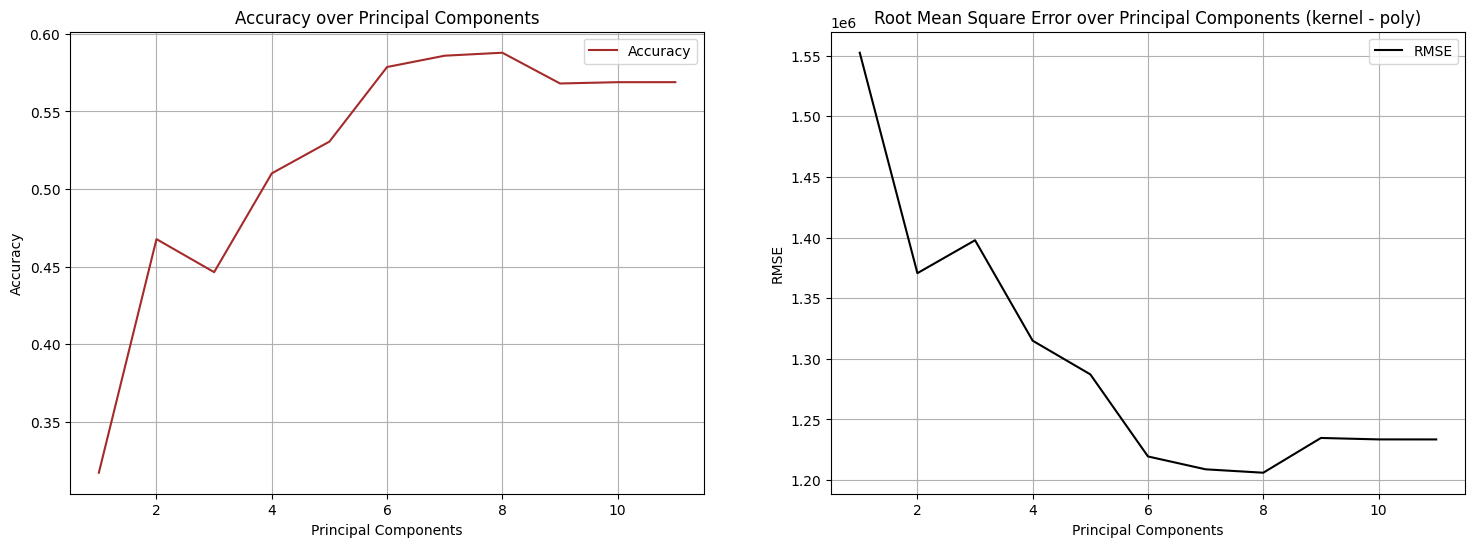

In [70]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, max_k+1), accuracy, color = 'brown', label = "Accuracy")
plt.grid()
plt.xlabel('Principal Components')
plt.ylabel('Accuracy')
plt.title('Accuracy over Principal Components')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, max_k+1), rmse, color = 'black', label = "RMSE")
plt.grid()
plt.xlabel('Principal Components')
plt.ylabel('RMSE')
plt.title('Root Mean Square Error over Principal Components (kernel - poly)')
plt.legend()

plt.show()